# Pipeline  and Composite Estimators
1. Transformers , Estimators , Composite Estimators, Pipelines
2. Pipelines : Benefits
3. Creating pipelines 
  - Class and Methods : Pipeline, make_pipeline  
  - Accessing estimators in a pipeline object
  - Accessing parameters  
  - GridSearch with pipeline. 
  - Eg: Feature extraction and SVC classifier training, and composite grid search
  - Caching Transformers  
4. Transforming target : Another composite estimator  
3. Feature Union : Composite feature space 
  - When to use
  - Examples:
4. Column Transformer 
  - When to use 
  - Examples:

#### 1. Terms : Transformers , Estimators , Composite Estimators, Pipelines  
- Common steps in ML are feature engineering, selection, model training with parameter tuning, scoring and evaluation. 
- All these steps can be bound together using pipeline class 
- Terms:
  - Estimator : Any class which uses data to learn, these are classifiers, regressors, feature selectors, feature scalers etc
  - Transformer : Estimator that has fit and transform method  
  - FeatureUnion : Used to combine the inputs of transformers that create feature space
  - TransformedTargetRegressor : Used to act on y to transform y  
  - Pipeline : Chain several estimators, all estimators except last one should be a transformer, last can be any estimator
    - **As a result, pipeline object has all methods that last estimator has, including fit and transform(it there).**
    - When fit method is called on pipeline, it in turn calls fit and transform on all previous transformers

#### 2. Pipelines : Benefits  
- Avoid leakage from test data to train data   
  - simple example : Scale train data, then apply same scaler on test data using parameters from train data. 
  - **prime example : in a CV settng, in case of multiple train/test splits, want to make sure scaling follows the above rule in each cv iteration. You don't want to scale the whole data beforehand and then perform CV**
- Grid search : can do a combined grid search over all parameters used in a pipeline, making it more comprehensive search or params. 
- Convenience / Short hand to chain steps

#### 3. Creating pipelines

#### 3.1 Class and Methods : Pipeline, make_pipeline

In [3]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC

##### Pipeline 
- Take k, v pairs; key being a name of estimator, values is estimator object

In [5]:
steps = [('dim_red', PCA()), ('clf', SVC())]
pipe = Pipeline(steps = steps)

In [6]:
pipe

Pipeline(memory=None,
     steps=[('dim_red', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

#### make_pipeline 
- shorthand, estimator names are automatically assigned, takes a list of estimators

In [12]:
pipe2 = make_pipeline(PCA(), SVC())
pipe2

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

#### 3.2 Accessing estimators in a pipeline object
Through Attributes:
  - steps : list 
  - named_steps : dictionary

In [13]:
pipe.steps

[('dim_red',
  PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)),
 ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]

In [16]:
pipe.named_steps['clf']

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 3.3 Accessing attributes of estimators  
- insidie pipe.set_params, can access params as (est_name)__(param)

In [18]:
pipe.set_params(clf__C=2)
pipe.named_steps['clf']

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 3.4 Grid Search wih Pipeline 
- Naming estimators, and being able to access their attributes, allows constructing grid search with pipeline very 
comprehensively 
  - **Can have estimators themselves as parameters to search, against name**
  - **Set parameters of estimators by accessing using estimator name**

#### 3.5 Eg: Dimesnionality reduction, classifier training, with composite grid search 
- Digits data set 
- Say we want to choose between dim. reduction techniques (PCA, NMF and univariate feature selection technique Chi Square), as well as see what number of dimension provide best predictive performance
  - Chi Sq characteristic $\sum_{i=i}^{k}\frac{(O_i-E_i)^2}{E_i}$ between a feature and cat. target, where k is number of cells in contingency/cross tab table, represents how dependent a target will be on feature, given DF is same for all features. So , it become a stat. for univariate selection  
  - NMF, non-negative matrix factorization, finds an approximate solution to matrix W $W = U x V$, which gives matrix
  U as a reeduced matrix that can be used instead of W

In [6]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target
X = digits.data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    shuffle = True, stratify = y, random_state = 123)
kf = KFold(n_splits=5, shuffle= True, random_state= 123)

In [67]:
steps = [('scaler', MinMaxScaler()),('dim_red', PCA()), ('clf', LinearSVC())]
pipe = Pipeline(steps = steps)
pipe

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('dim_red', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [68]:
n_comps = [2,4,6,8]
C_opts = [1,5,10]

In [69]:
# List of dictionaries 
#- tune only C 
#- tune choice of dim reduction method,no. of components and C
param_grid = [{'dim_red' : [None],
              'clf__C' : C_opts
             },
            {'dim_red' : [PCA(), NMF()],
              'dim_red__n_components' : n_comps,
              'clf__C' : C_opts
             },
             {'dim_red' : [SelectKBest(chi2)], # need to make a list
              'dim_red__k' : n_comps,
              'clf__C' : C_opts}]
gcv = GridSearchCV(pipe, param_grid = param_grid, cv = kf)

In [70]:
gcv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('dim_red', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'dim_red': [None], 'clf__C': [1, 5, 10]}, {'dim_red': [PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=8, random_state=None, ...=8, score_func=<function chi2 at 0x1a0f755a60>)], 'dim_red__k': [2, 4, 6, 8], 'c

In [72]:
gcv.cv_results_['mean_test_score']

array([ 0.96520529,  0.95963814,  0.95476688,  0.49965205,  0.7585247 ,
        0.81837161,  0.88308977,  0.31245651,  0.64787752,  0.78079332,
        0.82115518,  0.50243563,  0.76130828,  0.82115518,  0.88796103,
        0.31941545,  0.66388309,  0.80167015,  0.83228949,  0.50243563,
        0.76200418,  0.82115518,  0.88796103,  0.31871955,  0.66527488,
        0.80514962,  0.83716075,  0.32080724,  0.53166319,  0.66040362,
        0.75365344,  0.32150313,  0.53723034,  0.6631872 ,  0.7585247 ,
        0.3249826 ,  0.53792624,  0.6631872 ,  0.7592206 ])

In [74]:
gcv.best_params_

{'clf__C': 1, 'dim_red': None}

#### 3.6 Caching Transformers  
- **Transformations can be expensive operations**, Caching can be helpful when a transformer may need to be fit with the same input data 
- Useful in grid search, when input data for a cv iteration is same, and you want to apply a scaling transformation,
before search over hyperparameter of an estimator. 

#### 4. Transforming target : Another composite estimator  
- Useful in regression estimators when target needs to be transformed  
- Example of using a Quantile transformer on y before applying regression, to make it distribution uniform

In [91]:
import sklearn
sklearn.__version__

'0.19.1'

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.datasets import load_boston 
from matplotlib import pyplot as plt

In [35]:
data = load_boston()
y = data.target
X = data.data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    #test_size = 0.2, 
                                                    shuffle = True, random_state = 0)

In [36]:
lr = LinearRegression()
qtf = QuantileTransformer(n_quantiles= 1000, output_distribution= 'normal')
mod_lr = TransformedTargetRegressor(regressor= lr, transformer= qtf)
mod_lr

TransformedTargetRegressor(check_inverse=True, func=None, inverse_func=None,
              regressor=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
              transformer=QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='normal', random_state=None,
          subsample=100000))

In [37]:
mod_lr.fit(X_train, y_train)
test_score1 = mod_lr.score(X_test,y_test)
print('R sq for modified regression :', test_score1)
lr = LinearRegression()
lr.fit(X_train, y_train)
test_score2 = lr.score(X_test,y_test)
print('R sq for normal regression :', test_score2)

R sq for modified regression : 0.668128276483
R sq for normal regression : 0.63546384332


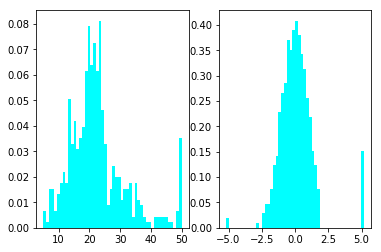

In [90]:
qtf = QuantileTransformer(n_quantiles= 100, output_distribution= 'normal')
y_ = qtf.fit_transform(y.reshape(506,-1))
plt.figure()
plt.subplot(1,2,1)
_ = plt.hist(y, bins = 50,histtype = 'bar',density = True,color = 'cyan')
plt.subplot(1,2,2)
_ = plt.hist(y_, bins = 50,histtype = 'bar',density = True,color = 'cyan')